**Intro**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

**Data Cleaning/ Preprocess the Data**

In [2]:
#Read data and remove non-US cities
df = pd.read_csv("/kaggle/input/historical-hourly-weather-data/temperature.csv", delimiter = ",")
df = df.drop('Vancouver', axis=1)
df = df.drop('Toronto', axis=1)
df = df.drop('Beersheba', axis=1)
df = df.drop('Montreal', axis=1)
df = df.drop('Tel Aviv District', axis=1)
df = df.drop('Eilat', axis=1)
df = df.drop('Haifa', axis=1)
df = df.drop('Nahariyya', axis=1)
df = df.drop('Jerusalem', axis=1)

df.head(3)

,datetime,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Philadelphia,New York,Boston
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,283.850000,294.030000,284.030000,298.17000,288.650000,299.720000,281.000000,285.630000,288.220000,287.170000
2,2012-10-01 14:00:00,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,283.889394,294.035341,284.069789,298.20523,288.650172,299.732518,281.024767,285.663208,288.247676,287.186092


In [3]:
df.describe()

,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,...,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Philadelphia,New York,Boston
count,45252.000000,44460.000000,45250.000000,45250.000000,45252.000000,45252.000000,45250.000000,45252.000000,45252.000000,45252.000000,...,45246.000000,45247.000000,45252.000000,45252.000000,45250.000000,44448.000000,45250.000000,45250.000000,44460.000000,45250.000000
mean,284.992929,288.155821,284.409626,290.846116,290.215044,292.424887,295.493358,285.617856,282.839407,293.785646,...,284.771904,289.772673,282.971668,294.333380,288.897483,298.181274,284.053939,285.374168,285.400406,283.779823
std,7.452438,5.332862,6.547986,6.460823,5.889992,10.829522,9.916743,9.853484,10.673464,8.303688,...,11.043634,8.703643,11.034481,6.682162,9.133072,4.190185,10.453927,10.242377,10.220932,9.802499
min,262.370000,272.300000,263.780000,266.503667,265.783333,260.561333,266.059000,255.042333,247.727667,265.050000,...,244.866333,259.500000,243.483333,268.610000,255.658333,275.233333,249.422667,250.390000,250.774000,249.540000
25%,279.850000,284.670000,279.830000,286.380000,286.254750,283.920000,287.680000,277.970000,275.060000,288.600000,...,276.110000,283.320417,274.690000,290.040875,282.010000,296.030000,275.857427,277.350636,277.370000,276.090000
50%,284.320000,287.610000,283.940000,290.530000,290.118750,292.027486,295.586667,286.120000,282.970667,295.184250,...,285.929333,291.050000,283.540000,295.640000,290.120000,298.880000,285.220000,285.927583,285.870000,284.133250
75%,289.451750,291.015167,288.530000,295.080000,294.107542,300.835000,303.050000,292.835643,290.680000,299.490000,...,293.960000,296.290000,292.231250,299.140000,295.770000,300.992375,292.580000,293.796000,293.760000,291.620000
max,312.520000,313.620000,307.300000,315.470000,313.360000,318.640000,321.220000,312.710000,313.750000,313.660000,...,312.040000,310.760000,308.050000,310.150000,310.900000,308.680000,306.290000,308.000000,310.240000,308.000000


In [4]:
#Take all hourly US city temperatures and condense into a single hourly US average temperature column
df['USAvgTemp'] = df[['Portland', 'San Francisco', 'Seattle', 'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City', 'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis', 'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami', 'Pittsburgh', 'Philadelphia', 'New York', 'Boston']].mean(axis=1)
df = df.loc[:,[ 'datetime','USAvgTemp']]
df.head(3)

,datetime,USAvgTemp
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,288.471111
2,2012-10-01 14:00:00,288.487097


In [5]:
#Convert from hourly measurements to daily averages
df['DATE'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
davg_df = df.groupby(pd.Grouper(freq='D', key='DATE')).mean()

# monthly
#davg_df2 = df.groupby(pd.Grouper(freq='M', key='DATE')).mean()

davg_df.head(3)

/tmp/ipykernel_20/1274773254.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  davg_df = df.groupby(pd.Grouper(freq='D', key='DATE')).mean()


,USAvgTemp
DATE,
2012-10-01,288.646997
2012-10-02,291.376971
2012-10-03,292.790571


In [6]:
#Remove nulls
davg_df[davg_df.isnull()]

#monthly
#davg_df2[davg_df2.isnull()]

,USAvgTemp
DATE,
2012-10-01,NaN
2012-10-02,NaN
2012-10-03,NaN
2012-10-04,NaN
2012-10-05,NaN
...,...
2017-11-26,NaN
2017-11-27,NaN
2017-11-28,NaN


In [7]:
davg_df['Points'] = range(0,len(davg_df.index.values))

#monthly
#davg_df2['Points'] = range(0,len(davg_df2.index.values))

In [8]:
#Convert from kelvin to Fahrenheit
davg_df['USAvgTemp'] = (davg_df['USAvgTemp'] - 273.15) * 9/5 + 32

#monthly
#davg_df2['USAvgTemp'] = (davg_df2['USAvgTemp'] - 273.15) * 9/5 + 32

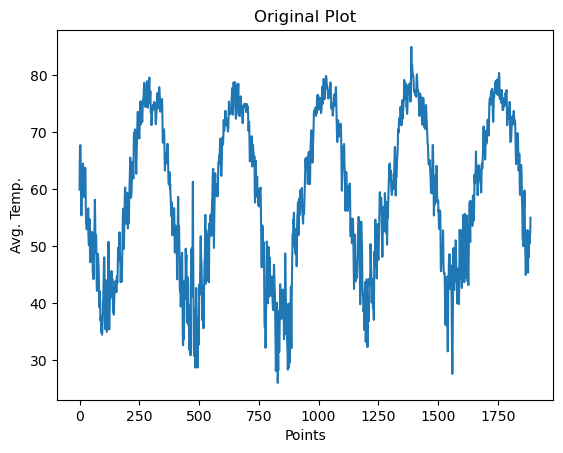

In [9]:
#Plot the original figure with US average temperatures in Fahrenheit over number of data points
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Points')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot('Points', 'USAvgTemp', data = davg_df);

**adfuller import** to perform Augmented Dickey-Fuller Test to determine if time series data is **stationary**


In [10]:
from statsmodels.tsa.stattools import adfuller

def stationary_ts_check(ts):
    #Compute moving average
    mov_avg = ts.rolling(window=325).mean()
    
    #plot original and moving average/rolling mean
    plt.figure(figsize=(10, 6))
    plt.plot(ts, color='orange', label='Original data')
    plt.plot(mov_avg, color='blue', label='Moving Average')
    plt.xlabel('Time')
    plt.ylabel('Average Temperature (F)')
    plt.title('Original Time Series and Moving Average')
    plt.legend()
    plt.show()
    
    #Augmented Dickey-Fuller test
    print('Augmented Dickey-Fuller test:')
    adf_output = adfuller(ts)
    df_result = pd.Series(adf_output[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_output[4].items():
        df_result['Critical Value (%s)' % key] = value
    print(df_result)


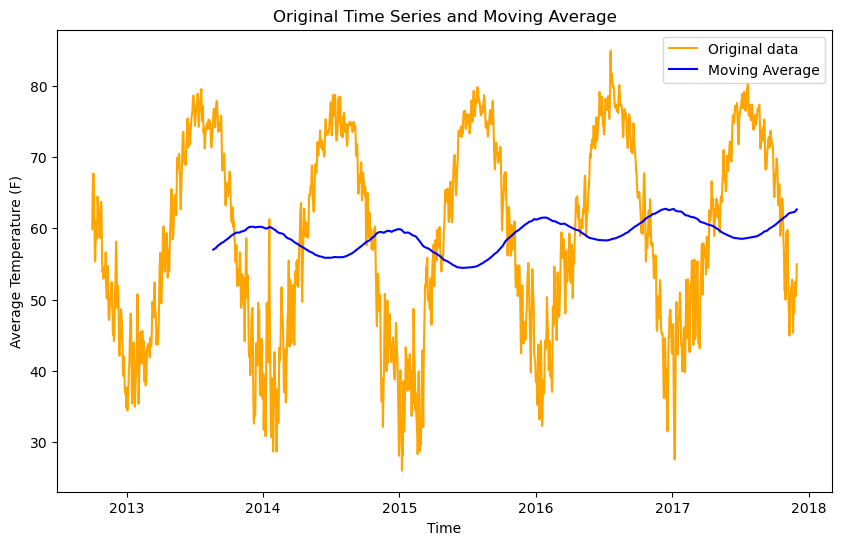

Augmented Dickey-Fuller test:
Test Statistic                   -2.438240
p-value                           0.131233
#Lags Used                       22.000000
Number of Observations Used    1864.000000
Critical Value (1%)              -3.433863
Critical Value (5%)              -2.863092
Critical Value (10%)             -2.567596
dtype: float64


In [11]:
stationary_ts_check(davg_df.USAvgTemp)

**Original Data** - unmodified time series dataset

**Rolling Mean** - Moving Average window calculated per 325 data points

**Visual check**- rolling mean appears to have no significant trends/patterns - likely stationary

**Augmented Dickey-Fuller test-** null hypothesis is rejected if p-value <5% - p value is 0.02, much smaller than 5% - null hypothesis rejected

In [12]:
davg_df.USAvgTemp.rolling(center=False,window=325).mean()

DATE
2012-10-01          NaN
2012-10-02          NaN
2012-10-03          NaN
2012-10-04          NaN
2012-10-05          NaN
                ...    
2017-11-26    62.396970
2017-11-27    62.460140
2017-11-28    62.535494
2017-11-29    62.604968
2017-11-30    62.661905
Freq: D, Name: USAvgTemp, Length: 1887, dtype: float64

In [13]:
from statsmodels.tsa.arima.model import ARIMA

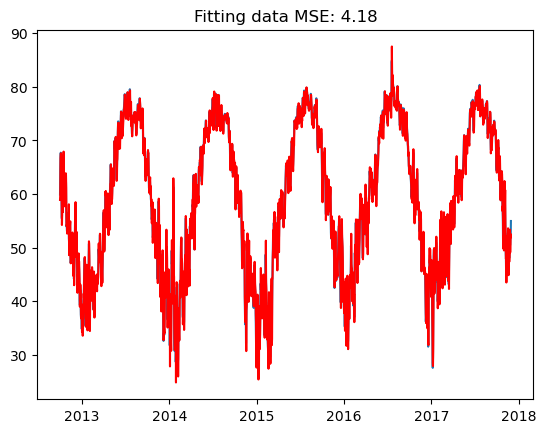

In [14]:
model = ARIMA(davg_df.USAvgTemp, order=(1,0,1))  
results = model.fit()  
plt.plot(davg_df.USAvgTemp)
plt.plot(results.fittedvalues, color='red')
plt.title('Fitting data MSE: %.2f'% (((results.fittedvalues-davg_df.USAvgTemp)**2).mean()))
plt.show()

In [15]:
#test future predictions
#predictions = results.predict('10/01/2012', '10/01/2025')

#test historical data predictions
predictions = results.predict(start = '10/01/2012',end = '10/01/2017')

In [16]:
predictions

DATE
2012-10-01    58.891462
2012-10-02    59.879645
2012-10-03    66.698242
2012-10-04    67.450208
2012-10-05    67.609255
                ...    
2017-09-27    71.212041
2017-09-28    71.226874
2017-09-29    68.373070
2017-09-30    65.672350
2017-10-01    64.813678
Freq: D, Name: predicted_mean, Length: 1827, dtype: float64

In [17]:
actuals = davg_df['10/01/2012':'10/01/2017']['USAvgTemp'][0:1887]

In [18]:
#Mean Absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:1887],predictions)
print(f'MAE:{mae}')

MAE:1.4652538279826386


In [19]:
davg_df.isnull().any(axis=0)

USAvgTemp    False
Points       False
dtype: bool

In [20]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(actuals[0:1887], predictions)

print(f'MSE: {mse}')

MSE: 4.162406922874848


In [21]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(actuals[0:1887], predictions)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

RMSE: 2.0401977656283345


In [22]:
#to check accuracy of our ARIMA model, keeping actual values aside

actuals = davg_df['10/01/2012':'10/01/2017']['USAvgTemp'][0:1887]

In [23]:
# Model Tuning

import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')

# parameter ranges
p = range(0, 4)
d = 0 #ARMA model
q = range(0, 4)

# all possible combinations of p and q
pq = itertools.product(p, q)

best_aic = float('inf') 
best_order = None

for order in pq:
    try:
        model = ARIMA(davg_df['USAvgTemp'], order=(*order, d))
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
        print(f'ARMA{order} - AIC: {aic:.2f}')
    except:
        continue

print(f'Best ARMA model: ARMA{best_order} - AIC: {best_aic:.2f}')

ARMA(0, 0) - AIC: 15192.84
ARMA(0, 1) - AIC: 8455.97
ARMA(0, 2) - AIC: 9057.85
ARMA(0, 3) - AIC: 10538.02
ARMA(1, 0) - AIC: 8453.69
ARMA(1, 1) - AIC: 8268.18
ARMA(1, 2) - AIC: 9041.02
ARMA(1, 3) - AIC: 10286.69
ARMA(2, 0) - AIC: 8253.61
ARMA(2, 1) - AIC: 7985.60
ARMA(2, 2) - AIC: 8651.53
ARMA(2, 3) - AIC: 9751.10
ARMA(3, 0) - AIC: 7984.91
ARMA(3, 1) - AIC: 7987.58
ARMA(3, 2) - AIC: 8577.17
ARMA(3, 3) - AIC: 9505.42
Best ARMA model: ARMA(3, 0) - AIC: 7984.91


In [24]:
newmodel = ARIMA(davg_df['USAvgTemp'], order =(3,0,0)) 
#order: (p,d,q) = autoregressive (p), differencing (d), moving average (q) 

results = newmodel.fit()
predictions = results.predict(start = '10/01/2012',end = '10/01/2017')

In [25]:
predictions = results.predict(start = '10/01/2012',end = '10/01/2017')
mae = mean_absolute_error(actuals[0:1887],predictions)
print(f'MAE:{mae}')

MAE:1.4451367029998206


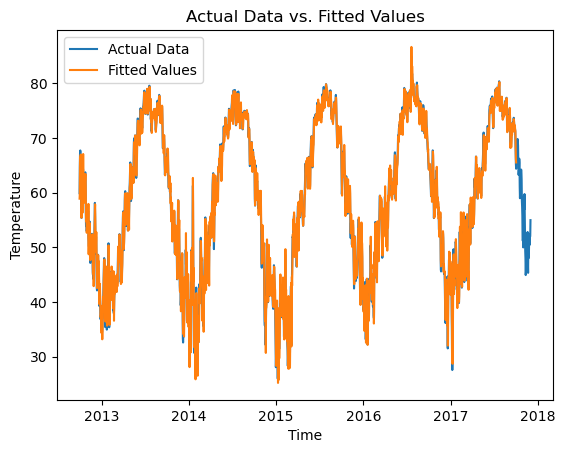

In [26]:
# Plotting the actual data and fitted values
plt.plot(davg_df['USAvgTemp'], label='Actual Data')
plt.plot(predictions, label='Fitted Values')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual Data vs. Fitted Values')
plt.legend()
plt.show()

In [27]:
# Model Tuning

p = q = range(0, 4)
d = range(0, 2)
pqd = itertools.product(p, d, q)

best_aic = np.inf
best_order = None

best_mse = np.inf
best_model = None

for param in pqd:
    try:
        model = ARIMA(davg_df['USAvgTemp'], order=param)
        results = model.fit()
        mse = ((results.fittedvalues - davg_df['USAvgTemp']) ** 2).mean()
        if mse < best_mse:
            best_mse = mse
            best_order = param
            best_model = results
        print('ARIMA{} - MSE:{}'.format(param, mse))
    except Exception as e:
        print(f"Exception occurred for ARIMA{param}: {e}")
        continue

ARIMA(0, 0, 0) - MSE:183.33677012473672
ARIMA(0, 0, 1) - MSE:51.03073595869689
ARIMA(0, 0, 2) - MSE:20.698589448154046
ARIMA(0, 0, 3) - MSE:12.129670575285973
ARIMA(0, 1, 0) - MSE:7.077327883375178
ARIMA(0, 1, 1) - MSE:6.134384761042756
ARIMA(0, 1, 2) - MSE:6.075006542161173
ARIMA(0, 1, 3) - MSE:5.8501384844419855
ARIMA(1, 0, 0) - MSE:5.140388121044646
ARIMA(1, 0, 1) - MSE:4.177645343828546
ARIMA(1, 0, 2) - MSE:4.135827935466073
ARIMA(1, 0, 3) - MSE:3.9354533768287565
ARIMA(1, 1, 0) - MSE:6.5827660539642565
ARIMA(1, 1, 1) - MSE:6.107009777953666
ARIMA(1, 1, 2) - MSE:5.834345544283353
ARIMA(1, 1, 3) - MSE:5.78991093132319
ARIMA(2, 0, 0) - MSE:4.619156101868853
ARIMA(2, 0, 1) - MSE:4.157818745910396
ARIMA(2, 0, 2) - MSE:3.9300425408330506
ARIMA(2, 0, 3) - MSE:3.880363672134126
ARIMA(2, 1, 0) - MSE:5.928303623312682
ARIMA(2, 1, 1) - MSE:5.928115765476473
ARIMA(2, 1, 2) - MSE:5.792192896254727
ARIMA(2, 1, 3) - MSE:5.78990335439563
ARIMA(3, 0, 0) - MSE:4.002867335911247
ARIMA(3, 0, 1) - MSE

Best ARIMA Order: (2, 0, 3)
Best MSE: 3.880363672134126


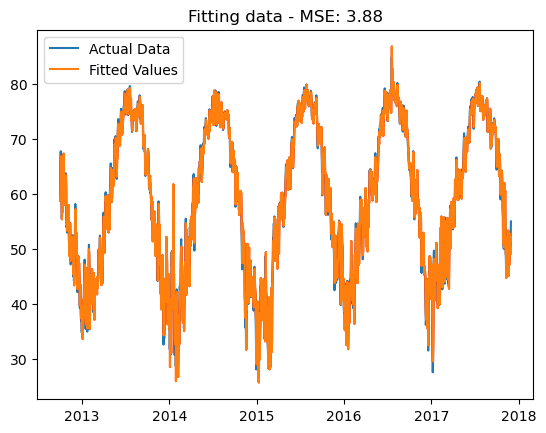

In [28]:
if best_model is not None:
    print('Best ARIMA Order:', best_order)
    print('Best MSE:', best_mse)

    plt.plot(davg_df['USAvgTemp'], label='Actual Data')
    plt.plot(best_model.fittedvalues, color='red')
    plt.plot(best_model.fittedvalues, label='Fitted Values')
    plt.title('Fitting data - MSE: %.2f' % best_mse)
    plt.legend()
    plt.show()
else:
    print('No best model found. Adjust your parameter range or check for errors in the data.')